In [ ]:
# Трекинг 1
# Образец один для всех фреймов, тот что на первом фрейме.
# На первых 5 фреймах работает хорошо, потом ломается.

In [1]:
from PIL import Image 
import PIL
import time
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

In [2]:
print("OpenCV version : {0}".format(cv2.__version__))

OpenCV version : 4.6.0


In [3]:
# Функция видео режет на картинки
def splitFrames(videoFileName):
    cap=cv2.VideoCapture(videoFileName)
    num=1
    e=1
    while True:
        success, data=cap.read()
        if not success:
            break
        im=Image.fromarray(data)
        #im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        #red, green, blue = cv2.split(im.numpy())
        #im = cv2.merge([red, green, blue])
        
        if num%12==0:
            if e<10:
                im.save('splitframes/'+str(0)+str(e)+'.jpg')
            else:
                im.save('splitframes/'+str(e)+'.jpg')
            e=e+1
        num=num+1
    cap.release()

In [43]:
start=time.time()
splitFrames('video_SL376676.avi')
end=time.time()
print("min",(end-start)/60)

min 0.011526195208231609


In [4]:
folder ='splitframes'

In [5]:
frames=os.listdir(folder)

In [6]:
frames.sort()
idx = frames.index('08.jpg')

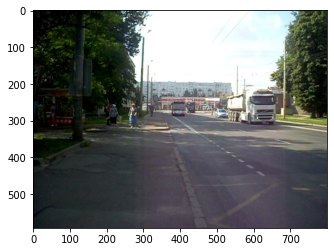

In [7]:
img = cv2.imread('splitframes/08.jpg') # 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
red, green, blue = cv2.split(img) #### Исправила порядок каналов цветов
img = cv2.merge([blue, green, red]) #### +
plt.imshow(img);

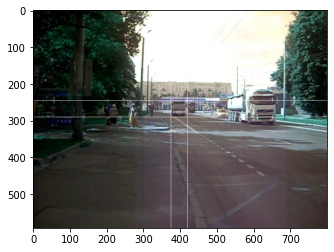

In [33]:
img[290,:]=250
plt.imshow(img)

In [8]:
x1, y1 = 375,245
x2, y2 = 420,290
    
width = x2 - x1
height = y2 - y1
width, height

(45, 45)

In [ ]:
######################################### Способ 1

In [9]:
search = width
search

45

In [10]:
img = cv2.imread(os.path.join(folder, frames[idx]))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
template = img[y1:y2, x1:x2]/255

In [11]:
template.size

6075

In [16]:
scale_list=np.arange(0.3,1.8,0.05)                                   #### added
scale_list

array([0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 ,
       0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35,
       1.4 , 1.45, 1.5 , 1.55, 1.6 , 1.65, 1.7 , 1.75])

0 375 245 44 44


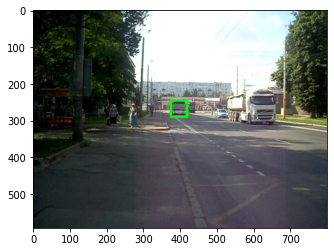

1 392 238 49 49


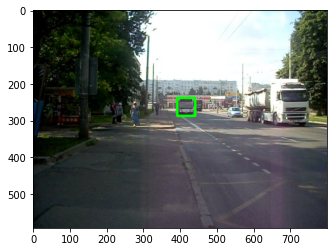

2 388 233 53 53


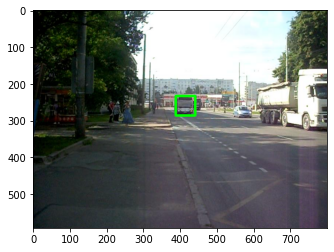

3 388 231 60 60


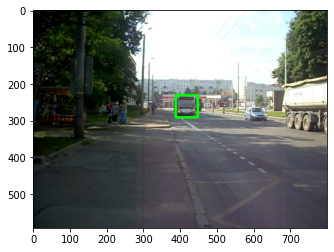

4 391 239 67 67


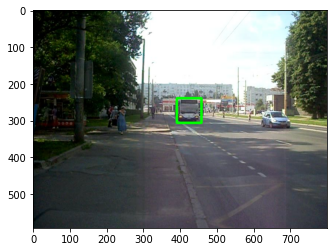

5 387 237 76 76


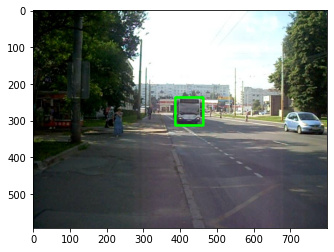

6 426 245 33 33


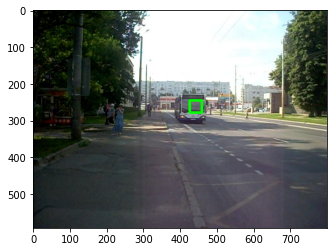

7 401 264 18 18


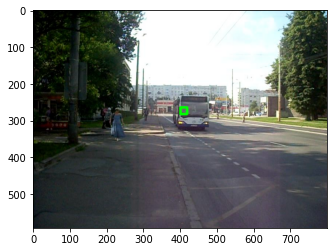

8 408 267 18 18


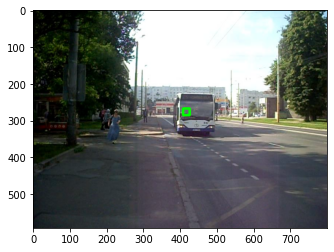

9 413 265 20 20


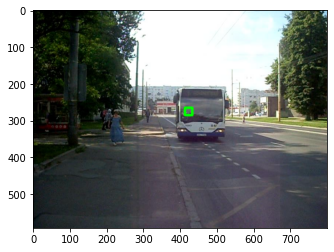

<Figure size 432x288 with 0 Axes>

In [17]:
for ii in range(idx, idx + 10):
    img = cv2.imread(os.path.join(folder, frames[ii]))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    red, green, blue = cv2.split(img)                                #### added
    img = cv2.merge([blue, green, red])                              #### added
              
    # Build local search window
    search_window = img[y1-search:y2+search, x1-search:x2+search]/255    
    
    # Tracking by minimising simple SAD (sum of absolute differences) loss
    # Equivalent to MSE loss (in **this** case) but faster
    track_x1 = None
    track_y1 = None
    height = None                                                     #### added
    width = None                                                      #### added
    loss = 1e6/template.size                                          ### edited
    for s in scale_list:                                              #### added
        t_h=int(template.shape[0]*s)                                  #### added
        t_w=int(template.shape[1]*s)                                  #### added
        template_scaled=cv2.resize(template,(t_h,t_w))                #### added
        for r in range(0, search_window.shape[0] - t_h):
            for c in range(0, search_window.shape[1] - t_w):
            
                candidate = search_window[r:r+t_h, c:c+t_w]
                score = np.sum(np.abs(template_scaled - candidate))/template_scaled.size   ### edited
                if score < loss:
                    loss = score
                    track_x1 = c
                    track_y1 = r                
                    height = t_h                                      #### added
                    width = t_w                                       #### added
    # Update the bounding box of the tracked object
    x1 = x1 - search + track_x1
    y1 = y1 - search + track_y1
    print(ii, x1, y1, width, height)
            
    # Show the tracker working
    cv2.rectangle(img, (x1, y1), (x1+width, y1+height), (0, 255, 0), 5)
    plt.imshow(img)
    plt.show(), plt.draw()
    